In [0]:
# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

# Performance
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score

def test_algorithms(classes, features, name_dataset):
    '''
    This function will take in data and run through three classification algorithms: 
    K-nearest neighbor, Gaussian Process Classifier, Linear Discriminant Analysis, and Support Vector Machine.
    It will return the time it took for the algorithm to run through the data,
    as well as the accuracy of the data. The data inputed is assumed to already have
    been processed for matrix operations.
    '''
    x_train, x_test, y_train, y_test = train_test_split(features, classes, random_state = 0)
    
    # Algorithm classifiers
    knn = KNeighborsClassifier()
    gpc = GaussianProcessClassifier()
    lda = LinearDiscriminantAnalysis()
    svm = SVC()
    dt = tree.DecisionTreeClassifier()
    rnf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    gradDescent = SGDClassifier(penalty=None)
    naiveBayes = GaussianNB()
    
    # K-nearest neighbor
    start_time_knn = time.time()

    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    knn_score =  accuracy_score(y_test, knn_pred)

    end_time_knn = time.time() - start_time_knn

    # Gaussian Process Classifier
    start_time_gpc = time.time()

    gpc.fit(x_train, y_train)
    gpc_pred = gpc.predict(x_test)
    gpc_score = accuracy_score(y_test, gpc_pred)

    end_time_gpc = time.time() - start_time_gpc

    # Linear-discriminant analysis
    start_time_lda = time.time()

    lda.fit(x_train, y_train)
    lda_pred = lda.predict(x_test)
    lda_score = accuracy_score(y_test, lda_pred)

    end_time_lda = time.time() - start_time_lda

    # Support Vector Machine
    start_time_svm = time.time()

    svm.fit(x_train, y_train)
    svm_pred = lda.predict(x_test)
    svm_score = accuracy_score(y_test, lda_pred)

    end_time_svm = time.time() - start_time_lda
    
    # Decision Tree
    start_time_dt = time.time()
    
    dt.fit(x_train, y_train)
    dt_score = dt.score(x_test, y_test)
    
    end_time_dt = time.time() - start_time_dt
    
    # Random Forest
    start_time_rnf = time.time()
    
    rnf.fit(x_train, y_train)
    rnf_score = rnf.score(x_test, y_test)
    
    end_time_rnf = time.time() - start_time_rnf
    
    # Gradient Descent
    start_time_gd = time.time()
    gradDescent.fit(x_train, y_train)
    gd_score = gradDescent.score(x_test, y_test)
    end_time_gd = time.time() - start_time_gd
    
    # Naive Bayes
    start_time_NB = time.time()
    naiveBayes.fit(x_train,y_train)
    NB_score = naiveBayes.score(x_test, y_test)
    end_time_NB = time.time() - start_time_NB
    
    return { 'Dataset': name_dataset,
    'KNN Accuracy': knn_score, 'KNN Time': end_time_knn, 
    'GPC Accuracy': gpc_score, 'GPC Time': end_time_gpc, 
    'LDA Accuracy': lda_score, 'LDA Time': end_time_lda, 
    'SVM Accuracy': svm_score, 'SVM Time': end_time_svm,
    'Decision Tree Accuracy': dt_score, 'DT Time': end_time_dt,
    'Random Forest Accuracy': rnf_score, 'RNF Time': end_time_rnf,
    'Gradient Descent Accuracy': gd_score, 'GD Time': end_time_gd,
    'Naive Bayes Accuracy':NB_score, 'NB Time': end_time_NB}

# **Mushroom Dataset**

In [0]:
import pandas as pd
mushrooms = pd.read_csv('mushrooms.csv')

In [0]:
from sklearn.preprocessing import LabelEncoder

# label encode mushroom data
labelencoder = LabelEncoder()
mushrooms = mushrooms.apply(labelencoder.fit_transform)

mushroom_features = mushrooms.iloc[:,1:]
mushroom_labels = mushrooms.iloc[:,0]

In [0]:
mushroom_test = test_algorithms(mushroom_labels, mushroom_features, "Mushroom")

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
mushroom_test

{'DT Time': 0.016743183135986328,
 'Dataset': 'Mushroom',
 'Decision Tree Accuracy': 1.0,
 'GD Time': 0.034300804138183594,
 'GPC Accuracy': 0.999015263417036,
 'GPC Time': 73.07799530029297,
 'Gradient Descent Accuracy': 0.9113737075332349,
 'KNN Accuracy': 0.9960610536681438,
 'KNN Time': 0.19102787971496582,
 'LDA Accuracy': 0.946824224519941,
 'LDA Time': 0.0440976619720459,
 'NB Time': 0.009251594543457031,
 'Naive Bayes Accuracy': 0.914327917282127,
 'RNF Time': 0.2532999515533447,
 'Random Forest Accuracy': 0.9241752831117676,
 'SVM Accuracy': 0.946824224519941,
 'SVM Time': 0.4822402000427246}

# **Wine Dataset**

In [0]:
# set features and labels wine data
Wine = pd.read_csv('winequality-red.csv')
wine_features = Wine.iloc[:,:-1]
wine_labels = Wine.iloc[:,-1]

In [0]:
wine_test = test_algorithms(wine_labels, wine_features, "Wine")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
wine_test

{'DT Time': 0.01874566078186035,
 'Dataset': 'Wine',
 'Decision Tree Accuracy': 0.63,
 'GD Time': 0.0272674560546875,
 'GPC Accuracy': 0.5675,
 'GPC Time': 12.004950761795044,
 'Gradient Descent Accuracy': 0.2125,
 'KNN Accuracy': 0.47,
 'KNN Time': 0.029713153839111328,
 'LDA Accuracy': 0.6075,
 'LDA Time': 0.009282827377319336,
 'NB Time': 0.004277706146240234,
 'Naive Bayes Accuracy': 0.55,
 'RNF Time': 0.15863418579101562,
 'Random Forest Accuracy': 0.59,
 'SVM Accuracy': 0.6075,
 'SVM Time': 0.20502376556396484}

# **Spam Dataset**

In [0]:
# set features and labels for spam data
spambase = pd.read_csv("spambase.data", header=None)
spam_features= spambase.iloc[:,:-1]
spam_labels = spambase.iloc[:,-1]

In [0]:
spam_test = test_algorithms(spam_labels, spam_features, "Spam")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
spam_test

{'DT Time': 0.11284017562866211,
 'Dataset': 'Spam',
 'Decision Tree Accuracy': 0.8992180712423979,
 'GD Time': 0.03357553482055664,
 'GPC Accuracy': 0.8036490008688097,
 'GPC Time': 59.581509828567505,
 'Gradient Descent Accuracy': 0.8670721112076455,
 'KNN Accuracy': 0.8140747176368376,
 'KNN Time': 0.08610391616821289,
 'LDA Accuracy': 0.8731537793223284,
 'LDA Time': 0.07596731185913086,
 'NB Time': 0.014357805252075195,
 'Naive Bayes Accuracy': 0.8027801911381407,
 'RNF Time': 0.23218369483947754,
 'Random Forest Accuracy': 0.8766290182450044,
 'SVM Accuracy': 0.8731537793223284,
 'SVM Time': 1.1981496810913086}

# **Police Data**

In [0]:
#Fixed with classification based on Race
from sklearn import preprocessing

start = time.time()

data = pd.read_csv('database.csv')

data = data.dropna()

classLabels = data['race']

features = pd.DataFrame(data, columns=data.columns[1:4], index=data.index)

features = features.join((pd.DataFrame(data["age"].astype(int))))

features = features.join(pd.DataFrame(data, columns=data.columns[6:6], index=data.index), sort = False)

features = features.join(pd.DataFrame(data, columns=data.columns[8:9], index=data.index), sort = False)

features = features.join((pd.DataFrame(data["signs_of_mental_illness"].astype(int))))

features = features.join(pd.DataFrame(data, columns=data.columns[11:len(data.columns)-1], index=data.index), sort = False)

  
encoder = preprocessing.LabelEncoder()
encoder.fit(classLabels)


encodedClassLabels = encoder.transform(classLabels)
encodedFeatures = features.apply(encoder.fit_transform)

In [0]:
police_test = test_algorithms(encodedClassLabels, encodedFeatures, "Police Data")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
police_test

{'DT Time': 0.011855125427246094,
 'Dataset': 'Police Data',
 'Decision Tree Accuracy': 0.42052313883299797,
 'GD Time': 0.04856276512145996,
 'GPC Accuracy': 0.5392354124748491,
 'GPC Time': 12.738317966461182,
 'Gradient Descent Accuracy': 0.5331991951710262,
 'KNN Accuracy': 0.4768611670020121,
 'KNN Time': 0.03046441078186035,
 'LDA Accuracy': 0.5674044265593562,
 'LDA Time': 0.008985280990600586,
 'NB Time': 0.004993915557861328,
 'Naive Bayes Accuracy': 0.5130784708249497,
 'RNF Time': 0.1464977264404297,
 'Random Forest Accuracy': 0.5352112676056338,
 'SVM Accuracy': 0.5674044265593562,
 'SVM Time': 0.3409395217895508}

# **Faces Dataset**

In [0]:
!tar xzf crop_part1.tar.gz

tar (child): crop_part1.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [0]:
import numpy as np
import cv2
import os
import sys
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras


#Have to run twice if starting from fresh run so that 
#directory we change to the correct one

directory = os.getcwd()

if directory == '/content':
  os.chdir('crop_part1')

genderLabels = list()
genderTextLabels = list()
'''
gender labels is the list of validated genders for each corresponding
photo
'''

for filename in os.listdir(directory)[0:3000]:
  split = filename.split('_')
  genderLabels.append(split[1])
  #img = cv2.imread(filename,1)
  #images.append(img)

filelist = os.listdir(directory)[0:3000]

images = np.array([cv2.imread(fname, 1) for fname in filelist])

encoded = images
imageDict = list()

for image in encoded:
  imageList = list() 
  for pixel in image:
    pixel = np.mean(pixel)
    imageList.append(pixel)
  imageDict.append(imageList)

for gender in genderLabels:
  if gender == "0":
    genderTextLabels.append(0)
  
  elif gender == "1":
    genderTextLabels.append(1)
  else:
    genderTextLabels.append(1)

images = images / 255.0

X_train, X_test, y_train, y_test = train_test_split(images, genderTextLabels, test_size=0.30)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200,200,3)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_images_start_time = time.time()

cnn.fit(X_train, y_train, epochs=10)

cnn_images_end_time = time.time() - cnn_images_start_time

W0613 22:25:35.302737 140665816233856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
2100/2100 [==============================] - 29s 14ms/step - loss: 2.5846 - acc: 0.3929
Epoch 2/10
2100/2100 [==============================] - 18s 9ms/step - loss: 1.7074 - acc: 0.5705
Epoch 3/10
2100/2100 [==============================] - 18s 9ms/step - loss: 1.1365 - acc: 0.7176
Epoch 4/10
2100/2100 [==============================] - 18s 9ms/step - loss: 1.0108 - acc: 0.7305
Epoch 5/10
2100/2100 [==============================] - 18s 9ms/step - loss: 0.7496 - acc: 0.7800
Epoch 6/10
2100/2100 [==============================] - 18s 9ms/step - loss: 0.6395 - acc: 0.7919
Epoch 7/10
2100/2100 [==============================] - 18s 9ms/step - loss: 0.5308 - acc: 0.8119
Epoch 8/10
2100/2100 [==============================] - 18s 9ms/step - loss: 0.4579 - acc: 0.8171
Epoch 9/10
2100/2100 [==============================] - 18s 9ms/step - loss: 0.3631 - acc: 0.8510
Epoch 10/10
2100/2100 [==============================] - 18s 9ms/step - loss: 0.3362 - acc: 0.8595


In [0]:
faces_test

{'DT Time': 0.6066138744354248,
 'Dataset': 'Female/Male/Photes',
 'Decision Tree Accuracy': 0.5573333333333333,
 'GD Time': 0.23866939544677734,
 'GPC Accuracy': 0.696,
 'GPC Time': 5.109435081481934,
 'Gradient Descent Accuracy': 0.6706666666666666,
 'KNN Accuracy': 0.632,
 'KNN Time': 0.4463670253753662,
 'LDA Accuracy': 0.6946666666666667,
 'LDA Time': 0.20644021034240723,
 'NB Time': 0.08516168594360352,
 'Naive Bayes Accuracy': 0.5733333333333334,
 'RNF Time': 0.6302542686462402,
 'Random Forest Accuracy': 0.6106666666666667,
 'SVM Accuracy': 0.6946666666666667,
 'SVM Time': 1.997300624847412}

In [0]:
face_test = test_algorithms(genderTextLabels, imageDict, "Female/Male Photos")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
face_test

{'DT Time': 0.5195660591125488,
 'Dataset': 'Female/Male Photos',
 'Decision Tree Accuracy': 0.5746666666666667,
 'GD Time': 0.14540863037109375,
 'GPC Accuracy': 0.4826666666666667,
 'GPC Time': 3.732562780380249,
 'Gradient Descent Accuracy': 0.6933333333333334,
 'KNN Accuracy': 0.596,
 'KNN Time': 0.37125658988952637,
 'LDA Accuracy': 0.692,
 'LDA Time': 0.19354701042175293,
 'NB Time': 0.07114577293395996,
 'Naive Bayes Accuracy': 0.556,
 'RNF Time': 0.5299379825592041,
 'Random Forest Accuracy': 0.568,
 'SVM Accuracy': 0.692,
 'SVM Time': 1.8235018253326416}

In [0]:
os.chdir("/content")

In [0]:
cnn_accuracy_photos = 0.8418
print(cnn_images_end_time)


35.61048674583435


# **Neural Network Code**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

def CNN(X,Y, test_images, test_labels,dim):
  model = Sequential()

  model.add(Dense(11, input_shape= dim ))
  model.add(Activation('relu'))

  model.add(Dense(5))
  model.add(Activation('relu'))

  model.add(Dense(2))
  model.add(Activation('softmax'))

  
  model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  hist = model.fit(X, Y,
         nb_epoch=50,
         shuffle=True,
         batch_size=128,
         validation_data=(X, Y))
  
  test_loss, test_acc = model.evaluate(test_images, test_labels)

  return(test_acc)

In [0]:
import pandas as pd
data = pd.read_csv("mushrooms.csv")
features = pd.DataFrame(data, columns=data.columns[1:len(data.columns)], index=data.index)
classLabels = data['class']

labelencoder = LabelEncoder()
mushrooms = mushrooms.apply(labelencoder.fit_transform)

mushroom_features = mushrooms.iloc[:,1:]
mushroom_labels = mushrooms.iloc[:,0]

#encoder = preprocessing.LabelEncoder()
#encoder.fit(classLabels)

#encodedClassLabels = encoder.transform(classLabels)
#encodedFeatures = features.apply(encoder.fit_transform)

""" 
Split data into train and test sets using 30% test set size.
"""

x_train, x_test, y_train, y_test = train_test_split(mushroom_features, 
                                                    mushroom_labels, test_size = 0.3)
cnn_mush_starttime = time.time()
cnn_accuracy_mush = CNN(x_train, y_train, x_test, y_test, [22])
cnn_mush_end_time = time.time() - cnn_mush_starttime

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 5686 samples, validate on 5686 samples
Epoch 1/50
5686/5686 [==============================] - 2s 264us/step - loss: 1.1515 - acc: 0.6377 - val_loss: 0.6708 - val_acc: 0.6843
Epoch 2/50
5686/5686 [==============================] - 0s 55us/step - loss: 0.6411 - acc: 0.7279 - val_loss: 0.6152 - val_acc: 0.7626
Epoch 3/50
5686/5686 [==============================] - 0s 58us/step - loss: 0.5875 - acc: 0.7738 - val_loss: 0.5507 - val_acc: 0.7884
Epoch 4/50
5686/5686 [==============================] - 0s 56us/step - loss: 0.5197 - acc: 0.8069 - val_loss: 0.4853 - val_acc: 0.8241
Epoch 5/50
5686/5686 [==============================] - 0s 54us/step - loss: 0.4570 - acc: 0.8326 - val_loss: 0.4265 - val_acc: 0.8477
Epoch 6/50
5686/5686 [==============================] - 0s 58us/step - loss: 0.4040 - acc: 0.8586 - val_loss: 0.3805 - val_acc: 0.8681
Epoch 7/50
5686/5686 [==============================] - 0s 56us/step - loss: 0.3636 - acc: 0.8753 - val_loss: 0.3483 - val_acc: 0.8813
Epoch 

In [0]:
import numpy as np
import cv2
import os
import sys
import pandas
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

data = pandas.read_csv('winequality-red.csv')
features = pandas.DataFrame(data, columns=data.columns[1:len(data.columns)], index=data.index)
classLabels = data['quality']

#print(data.shape)

encoder = preprocessing.LabelEncoder()
encoder.fit(classLabels)

encodedClassLabels = encoder.transform(classLabels)
encodedFeatures = features.apply(encoder.fit_transform)

encodedClassLabels = np.true_divide(encodedClassLabels, 5)

#print(type(encodedClassLabels))
""" 
Split data into train and test sets using 30% test set size.
"""

x_train, x_test, y_train, y_test = train_test_split(encodedFeatures, 
                                                    encodedClassLabels, test_size = 0.3)
cnn_wine_start = time.time()
cnn_wine_accuracy = CNN(x_train, y_train, x_test, y_test, [11])
cnn_wine_end = time.time() - cnn_wine_start

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1119 samples, validate on 1119 samples
Epoch 1/50
1119/1119 [==============================] - 1s 905us/step - loss: 0.7851 - acc: 0.0116 - val_loss: 0.5598 - val_acc: 0.0116
Epoch 2/50
1119/1119 [==============================] - 0s 58us/step - loss: 0.4645 - acc: 0.0116 - val_loss: 0.3306 - val_acc: 0.0107
Epoch 3/50
1119/1119 [==============================] - 0s 66us/step - loss: 0.2697 - acc: 0.0107 - val_loss: 0.2116 - val_acc: 0.0098
Epoch 4/50
1119/1119 [==============================] - 0s 59us/step - loss: 0.1837 - acc: 0.0098 - val_loss: 0.1616 - val_acc: 0.0080
Epoch 5/50
1119/1119 [==============================] - 0s 56us/step - loss: 0.1553 - acc: 0.0080 - val_loss: 0.1542 - val_acc: 0.0080
Epoch 6/50
1119/1119 [==============================] - 0s 59us/step - loss: 0.1552 - acc: 0.0080 - val_loss: 0.1542 - val_acc: 0.0080
Epoch 7/50
1119/1119 [==============================] - 0s 66us/step - loss: 0.1536 - acc: 0.0080 - val_loss: 0.1526 - val_acc: 0.0080
Epoch 

In [0]:
nums = list(range(0,57))
nums.append("Class")
data = pd.read_csv('spambase.data', names = nums)

features = pd.DataFrame(data, columns=data.columns[0:len(data.columns)-1], index=data.index)
classLabels = data["Class"]


encoder = preprocessing.LabelEncoder()
encoder.fit(classLabels)

encodedClassLabels = encoder.transform(classLabels)
encodedFeatures = features.apply(encoder.fit_transform)

x_train, x_test, y_train, y_test = train_test_split(encodedFeatures, 
                                                    encodedClassLabels, test_size = 0.3)
cnn_spam_start = time.time()
cnn_accuracy_spam = CNN(x_train, y_train, x_test, y_test, [57])
cnn_spam_end = time.time()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 3220 samples, validate on 3220 samples
Epoch 1/50
3220/3220 [==============================] - 1s 456us/step - loss: 6.2865 - acc: 0.5391 - val_loss: 5.4346 - val_acc: 0.5733
Epoch 2/50
3220/3220 [==============================] - 0s 65us/step - loss: 4.5643 - acc: 0.6016 - val_loss: 3.2764 - val_acc: 0.6425
Epoch 3/50
3220/3220 [==============================] - 0s 56us/step - loss: 2.2260 - acc: 0.6348 - val_loss: 1.4364 - val_acc: 0.6366
Epoch 4/50
3220/3220 [==============================] - 0s 68us/step - loss: 1.0608 - acc: 0.6907 - val_loss: 0.7986 - val_acc: 0.7435
Epoch 5/50
3220/3220 [==============================] - 0s 65us/step - loss: 0.7038 - acc: 0.7590 - val_loss: 0.6325 - val_acc: 0.7780
Epoch 6/50
3220/3220 [==============================] - 0s 59us/step - loss: 0.6089 - acc: 0.7863 - val_loss: 0.5719 - val_acc: 0.7876
Epoch 7/50
3220/3220 [==============================] - 0s 61us/step - loss: 0.5552 - acc: 0.7932 - val_loss: 0.5280 - val_acc: 0.8012
Epoch 

In [0]:
import pandas as pd

data = pd.read_csv('database.csv')

data = data.dropna()

classLabels = data['race']

features = pd.DataFrame(data, columns=data.columns[1:4], index=data.index)

features = features.join((pd.DataFrame(data["age"].astype(int))))

features = features.join(pd.DataFrame(data, columns=data.columns[6:6], index=data.index), sort = False)

features = features.join(pd.DataFrame(data, columns=data.columns[8:9], index=data.index), sort = False)

features = features.join((pd.DataFrame(data["signs_of_mental_illness"].astype(int))))

features = features.join(pd.DataFrame(data, columns=data.columns[11:len(data.columns)-1], index=data.index), sort = False)

  
encoder = preprocessing.LabelEncoder()
encoder.fit(classLabels)


encodedClassLabels = encoder.transform(classLabels)
encodedFeatures = features.apply(encoder.fit_transform)

encodedClassLabels = np.true_divide(encodedClassLabels, 5)


x_train, x_test, y_train, y_test = train_test_split(encodedFeatures, 
                                                    encodedClassLabels, test_size = 0.3)
cnn_start_police = time.time()
cnn_accuracy_police = CNN(x_train, y_train, x_test, y_test, [8])
cnn_end_police = time.time() - cnn_start_police

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1390 samples, validate on 1390 samples
Epoch 1/50
1390/1390 [==============================] - 1s 801us/step - loss: 7.7456 - acc: 0.0583 - val_loss: 7.6858 - val_acc: 0.0561
Epoch 2/50
1390/1390 [==============================] - 0s 55us/step - loss: 7.6706 - acc: 0.0518 - val_loss: 7.6284 - val_acc: 0.0496
Epoch 3/50
1390/1390 [==============================] - 0s 53us/step - loss: 7.6233 - acc: 0.0561 - val_loss: 7.5568 - val_acc: 0.0626
Epoch 4/50
1390/1390 [==============================] - 0s 51us/step - loss: 7.5252 - acc: 0.0590 - val_loss: 7.4803 - val_acc: 0.0532
Epoch 5/50
1390/1390 [==============================] - 0s 47us/step - loss: 7.4701 - acc: 0.0496 - val_loss: 7.4232 - val_acc: 0.0590
Epoch 6/50
1390/1390 [==============================] - 0s 50us/step - loss: 7.4079 - acc: 0.0576 - val_loss: 7.3503 - val_acc: 0.0626
Epoch 7/50
1390/1390 [==============================] - 0s 59us/step - loss: 7.3143 - acc: 0.0655 - val_loss: 7.2511 - val_acc: 0.0719
Epoch 

In [0]:
cnn_dict_accuracy = {'Photos': cnn_accuracy_photos, 'Wine': cnn_wine_accuracy, 'Police': cnn_accuracy_police,  'Mushroom': cnn_accuracy_mush,  'Spam': cnn_accuracy_spam }


cnn_dict_time = {'Photos': cnn_images_end_time , 'Wine': cnn_wine_end, 'Police': cnn_end_police, 'Mushroom': cnn_mush_end_time,  'Spam': cnn_spam_end}


cnn_dicts = [cnn_dict_accuracy, cnn_dict_time]
cnn_df = pd.concat([pd.Series(d) for d in cnn_dicts], axis=1)

cnn_df.columns = ['Accuracy', 'Time']
cnn_df

,Accuracy,Time
Photos,0.841800,3.561049e+01
Wine,0.004167,5.055171e+00
Police,0.476510,6.486138e+00
Mushroom,0.990156,1.826500e+01
Spam,0.913831,1.560458e+09


# **Plots**

In [0]:
mydicts = [faces_test, wine_test, police_test, mushroom_test, spam_test]
df = pd.concat([pd.Series(d) for d in mydicts], axis=1).T
df = df.set_index("Dataset")
df

,KNN Accuracy,KNN Time,GPC Accuracy,GPC Time,LDA Accuracy,LDA Time,SVM Accuracy,SVM Time,Decision Tree Accuracy,DT Time,Random Forest Accuracy,RNF Time,Gradient Descent Accuracy,GD Time,Naive Bayes Accuracy,NB Time
Dataset,,,,,,,,,,,,,,,,
Female/Male/Photes,0.609333,0.447902,0.681333,5.45778,0.637333,0.213512,0.637333,2.04264,0.585333,0.542068,0.617333,0.631046,0.605333,0.178545,0.56,0.0929341
Wine,0.47,0.0334253,0.5675,10.392,0.6075,0.00749111,0.6075,0.207202,0.6425,0.0149834,0.59,0.12997,0.59,0.0237544,0.55,0.00341201
Police Data,0.476861,0.0271723,0.539235,9.06813,0.567404,0.00681782,0.567404,0.311958,0.428571,0.0110421,0.535211,0.122587,0.325956,0.032902,0.513078,0.0032084
Mushroom,0.996061,0.146899,0.999015,58.3489,0.946824,0.0350549,0.946824,0.480667,1,0.0166407,0.924175,0.242682,0.960118,0.0429008,0.914328,0.00815797
Spam,0.814075,0.0797527,0.803649,57.8617,0.873154,0.0635087,0.873154,1.18542,0.901825,0.107491,0.876629,0.235888,0.841008,0.023401,0.80278,0.00909424


In [0]:
import seaborn as sns

Text(0.5, 1.0, 'KNN Time')

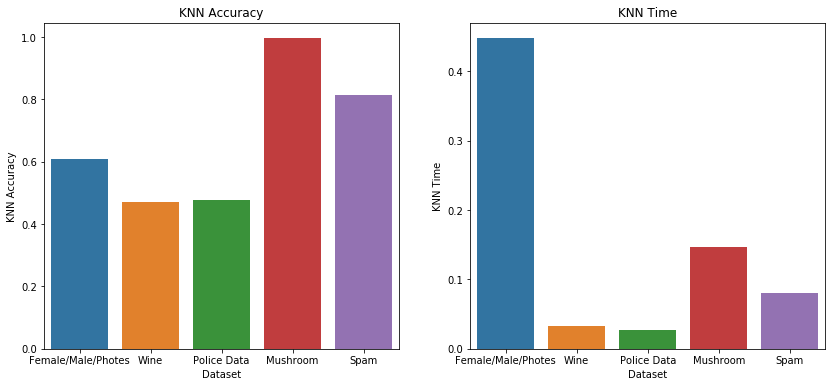

In [0]:
plt.rcParams["figure.figsize"] = (14,6)

fig, ax =plt.subplots(1,2)
sns.barplot(x=df.index, y=df['KNN Accuracy'], ax = ax[0]).set_title('KNN Accuracy')
sns.barplot(x=df.index, y=df['KNN Time'], ax = ax[1]).set_title('KNN Time')

Text(0.5, 1.0, 'GPC Time')

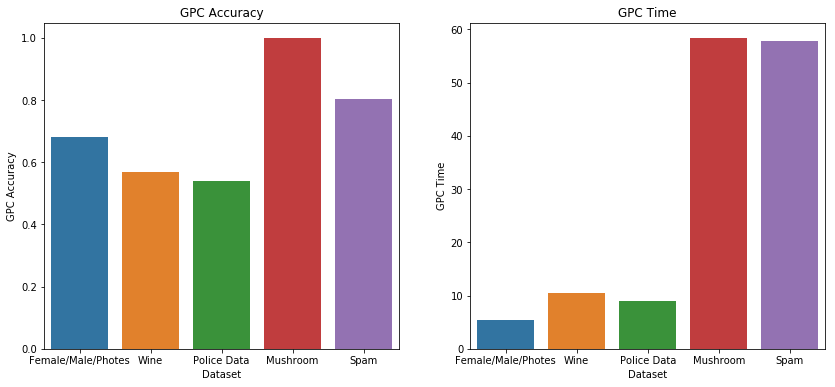

In [0]:
fig, ax =plt.subplots(1,2)
sns.barplot(x=df.index, y=df['GPC Accuracy'], ax = ax[0]).set_title('GPC Accuracy')
sns.barplot(x=df.index, y=df['GPC Time'], ax = ax[1]).set_title('GPC Time')

Text(0.5, 1.0, 'LDA Time')

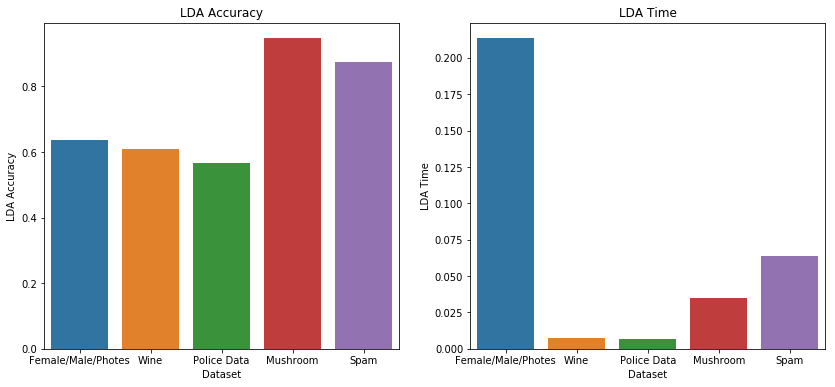

In [0]:
fig, ax =plt.subplots(1,2)
sns.barplot(x=df.index, y=df['LDA Accuracy'], ax = ax[0]).set_title('LDA Accuracy')
sns.barplot(x=df.index, y=df['LDA Time'], ax = ax[1]).set_title('LDA Time')

Text(0.5, 1.0, 'SVM Time')

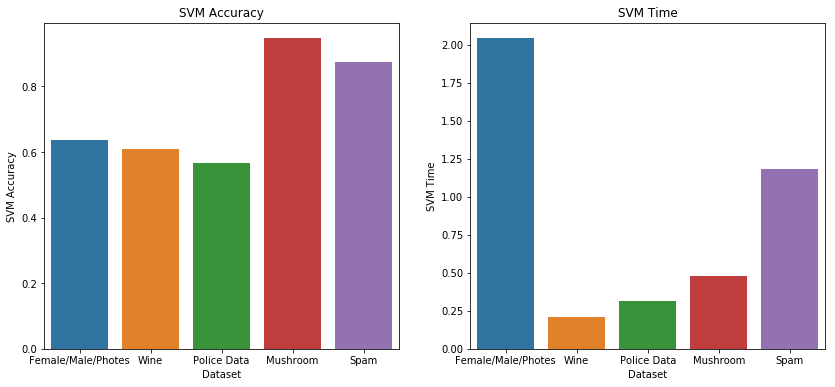

In [0]:
fig, ax =plt.subplots(1,2)
sns.barplot(x=df.index, y=df['SVM Accuracy'], ax = ax[0]).set_title("SVM Accuracy")
sns.barplot(x=df.index, y=df['SVM Time'], ax = ax[1]).set_title('SVM Time')

Text(0.5, 1.0, 'DT Time')

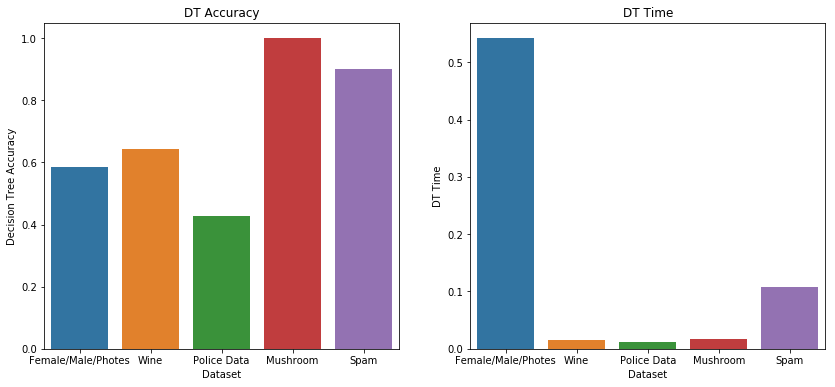

In [0]:
fig, ax =plt.subplots(1,2)
sns.barplot(x=df.index, y=df['Decision Tree Accuracy'], ax = ax[0]).set_title('DT Accuracy')
sns.barplot(x=df.index, y=df['DT Time'], ax = ax[1]).set_title('DT Time')

Text(0.5, 1.0, 'RNF Time')

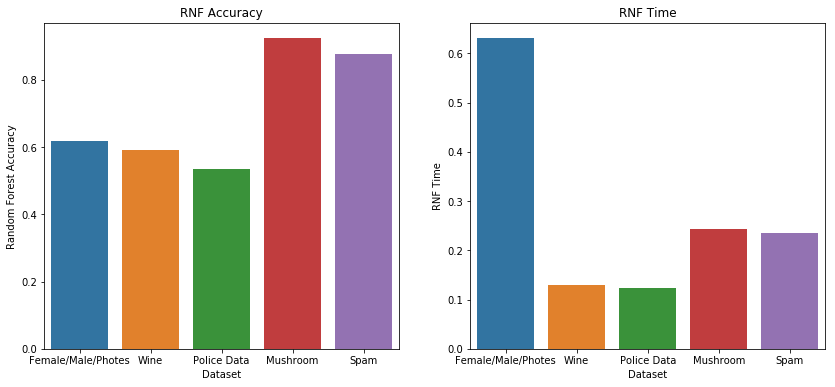

In [0]:
fig, ax =plt.subplots(1,2)
sns.barplot(x=df.index, y=df['Random Forest Accuracy'], ax = ax[0]).set_title('RNF Accuracy')
sns.barplot(x=df.index, y=df['RNF Time'], ax = ax[1]).set_title('RNF Time')

Text(0.5, 1.0, 'GD Time')

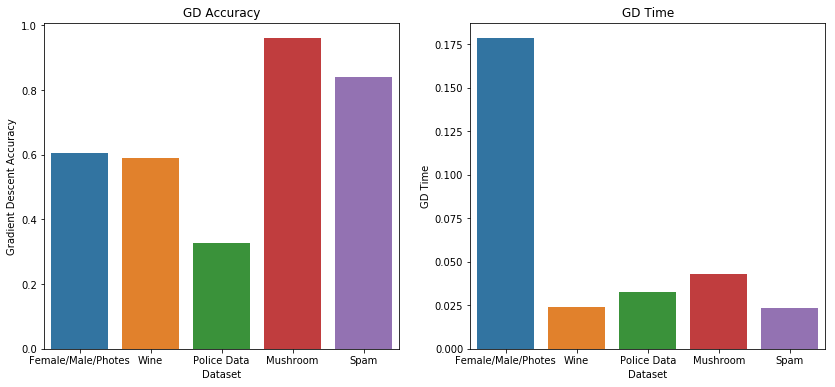

In [0]:
fig, ax =plt.subplots(1,2)
sns.barplot(x=df.index, y=df['Gradient Descent Accuracy'], ax = ax[0]).set_title('GD Accuracy')
sns.barplot(x=df.index, y=df['GD Time'], ax = ax[1]).set_title('GD Time')

Text(0.5, 1.0, 'NB Time')

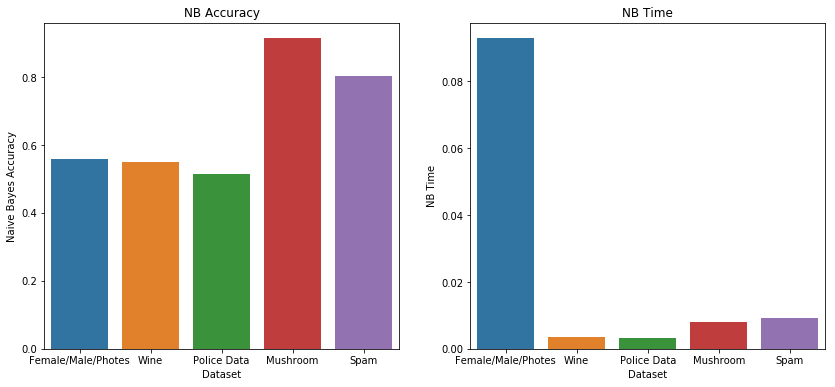

In [0]:
fig, ax =plt.subplots(1,2)
sns.barplot(x=df.index, y=df['Naive Bayes Accuracy'], ax = ax[0]).set_title('NB Accuracy')
sns.barplot(x=df.index, y=df['NB Time'], ax = ax[1]).set_title('NB Time')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

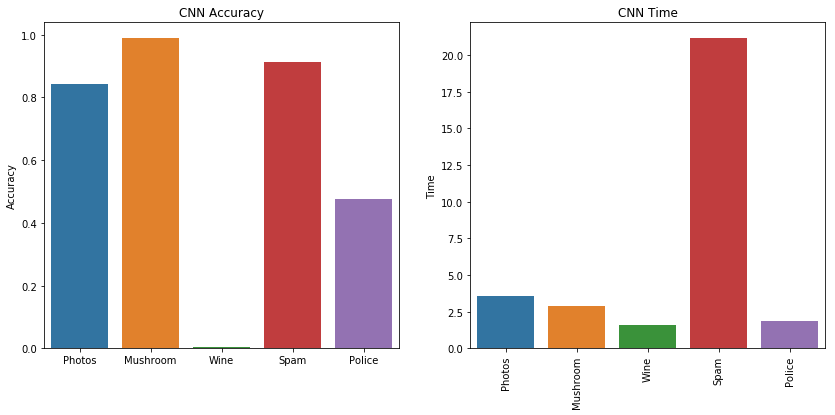

In [0]:
fig, ax =plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (14,6)
sns.barplot(x=cnn_df.index, y=cnn_df['Accuracy'], ax = ax[0]).set_title('CNN Accuracy')
sns.barplot(x=cnn_df.index, y=np.log(cnn_df['Time']), ax = ax[1]).set_title('CNN Time')

plt.xticks(rotation=90)